# 1. Get Data

In [1]:
import tushare as ts
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.ticker as mtick

In [2]:
pro = ts.pro_api()

In [3]:
def get_index_daily(ts_code, start_date):
    '''
    To get specified index data and formalize it
    
    
    output: A dataframe corresponds to a data
    '''
    df = pro.index_daily(ts_code = ts_code, start_date = start_date, end_date = '')
    df['trade_date'] = pd.to_datetime(df['trade_date'].astype(str), format = '%Y-%m-%d')
    df.set_index('trade_date',inplace=True)
    return df

In [4]:
df_hs = get_index_daily(ts_code = '000300.SH', start_date = '20140930')

In [5]:
df_hs.head(5)

,ts_code,close,open,high,low,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2022-07-11,000300.SH,4354.6167,4406.1476,4406.1476,4330.5819,4428.7810,-74.1643,-1.6746,134448578.0,2.991952e+08
2022-07-08,000300.SH,4428.7810,4468.0627,4479.4937,4426.8856,4443.4736,-14.6926,-0.3307,123195739.0,3.040311e+08
2022-07-07,000300.SH,4443.4736,4425.2814,4457.3431,4391.1938,4423.9698,19.5038,0.4409,132660906.0,3.281331e+08
2022-07-06,000300.SH,4423.9698,4475.4815,4484.3615,4393.4165,4489.5383,-65.5685,-1.4605,149800235.0,3.446727e+08
2022-07-05,000300.SH,4489.5383,4505.4572,4530.3245,4439.4511,4496.0303,-6.4920,-0.1444,154962415.0,3.618919e+08


# 2. Build SMA

In [6]:
# 10-day
df_hs['SMA10'] = df_hs['close'].rolling(10).mean()
# 60-day
df_hs['SMA60'] = df_hs['close'].rolling(60).mean()

# 30-day
df_hs['SMA30'] = df_hs['close'].rolling(30).mean()
# 50-day
df_hs['SMA50'] = df_hs['close'].rolling(50).mean()

# 100-day
df_hs['SMA100'] = df_hs['close'].rolling(100).mean()
# 200-day
df_hs['SMA200'] = df_hs['close'].rolling(200).mean()

In [7]:
df_hs.iloc[0:15, :]

,ts_code,close,open,high,low,pre_close,change,pct_chg,vol,amount,SMA10,SMA60,SMA30,SMA50,SMA100,SMA200
trade_date,,,,,,,,,,,,,,,,
2022-07-11,000300.SH,4354.6167,4406.1476,4406.1476,4330.5819,4428.7810,-74.1643,-1.6746,134448578.0,2.991952e+08,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-08,000300.SH,4428.7810,4468.0627,4479.4937,4426.8856,4443.4736,-14.6926,-0.3307,123195739.0,3.040311e+08,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-07,000300.SH,4443.4736,4425.2814,4457.3431,4391.1938,4423.9698,19.5038,0.4409,132660906.0,3.281331e+08,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-06,000300.SH,4423.9698,4475.4815,4484.3615,4393.4165,4489.5383,-65.5685,-1.4605,149800235.0,3.446727e+08,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-05,000300.SH,4489.5383,4505.4572,4530.3245,4439.4511,4496.0303,-6.4920,-0.1444,154962415.0,3.618919e+08,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-04,000300.SH,4496.0303,4447.2159,4496.0338,4427.8232,4466.7179,29.3124,0.6562,146345651.0,3.569685e+08,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-01,000300.SH,4466.7179,4489.5204,4500.9853,4449.2914,4485.0108,-18.2929,-0.4079,144779599.0,3.184921e+08,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-30,000300.SH,4485.0108,4418.0656,4514.9968,4418.0656,4421.3570,63.6538,1.4397,156666289.0,3.543439e+08,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-29,000300.SH,4421.3570,4472.7346,4503.1307,4413.9961,4490.5166,-69.1596,-1.5401,187276688.0,3.959261e+08,NaN,NaN,NaN,NaN,NaN,NaN


# Visualization

<AxesSubplot:title={'center':'HS300 stockprice| SMAs'}, xlabel='trade_date'>

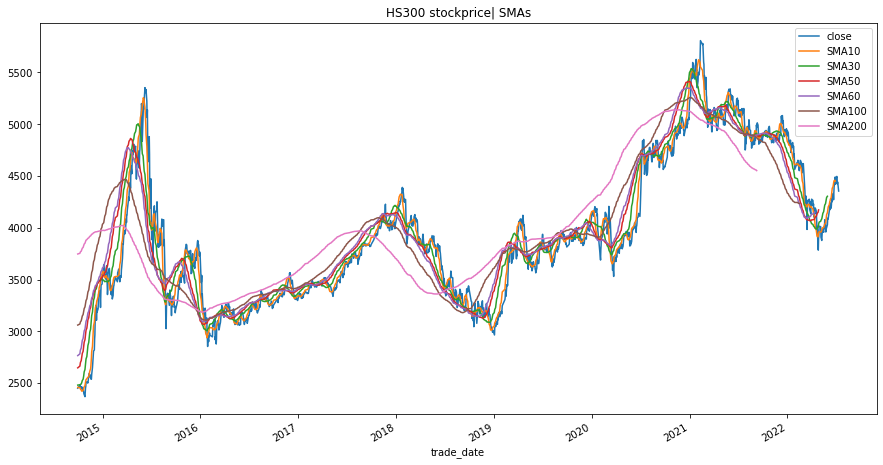

In [8]:
 df_hs[['close','SMA10', 'SMA30', 'SMA50','SMA60', 'SMA100', 'SMA200']].plot(figsize=(15,8), 
                                               title = 'HS300 stockprice| SMAs')

# Trading Strategy

In [9]:
df_hs.dropna(inplace=True)

In [10]:
df_hs['position_1'] = np.where(df_hs['SMA10'] > df_hs['SMA60'], 1, -1)

In [11]:
df_hs['position_2'] = np.where(df_hs['SMA50'] > df_hs['SMA100'], 1, -1)

In [12]:
df_hs['position_3'] = np.where(df_hs['SMA50'] > df_hs['SMA200'], 1, -1)

<AxesSubplot:xlabel='trade_date'>

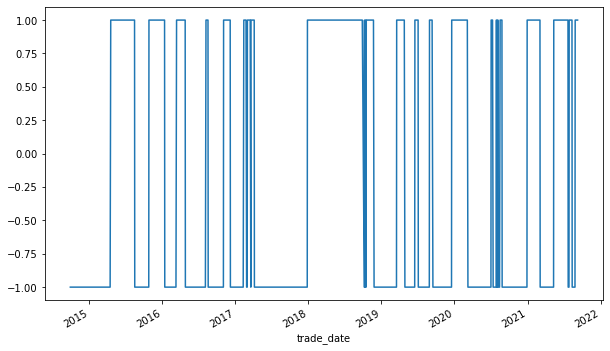

In [13]:
df_hs['position_1'].plot(secondary_y='Position_1', figsize=(10, 6))

<AxesSubplot:xlabel='trade_date'>

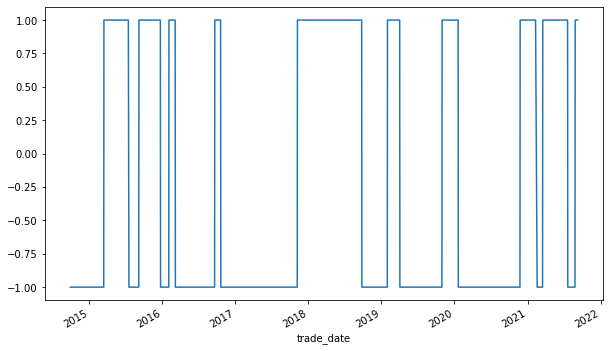

In [14]:
df_hs['position_2'].plot(secondary_y='Position_2', figsize=(10, 6))

<AxesSubplot:xlabel='trade_date'>

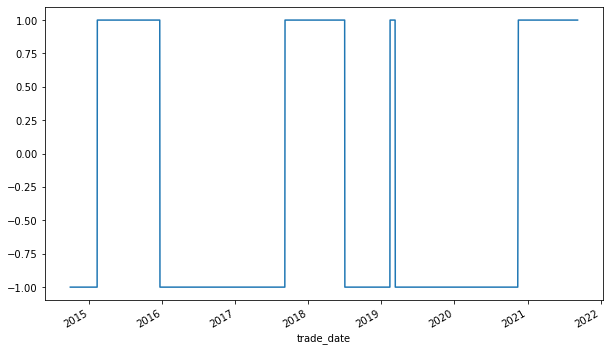

In [15]:
df_hs['position_3'].plot(secondary_y='Position_3', figsize=(10, 6))

# Backtesting

In [16]:
# 计算大盘收益
df_hs['returns'] = np.log(df_hs['close'] / df_hs['close'].shift(1))

In [17]:
df_hs.dropna(inplace=True)

<AxesSubplot:xlabel='trade_date'>

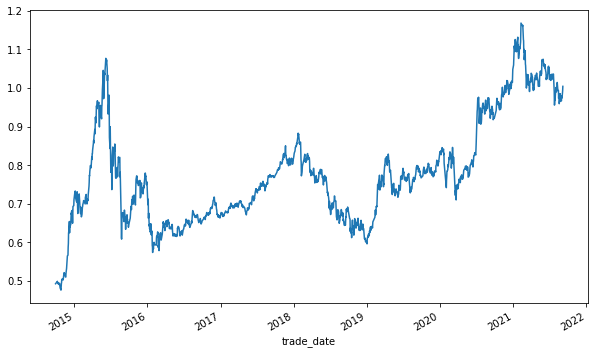

In [18]:
 df_hs['returns'].cumsum().apply(np.exp).plot(figsize=(10,6))

In [19]:
# 计算策略收益
df_hs['strategy_1'] = df_hs['position_1'].shift(1) * df_hs['returns']
df_hs['strategy_2'] = df_hs['position_2'].shift(1) * df_hs['returns']
df_hs['strategy_3'] = df_hs['position_3'].shift(1) * df_hs['returns']

<AxesSubplot:xlabel='trade_date'>

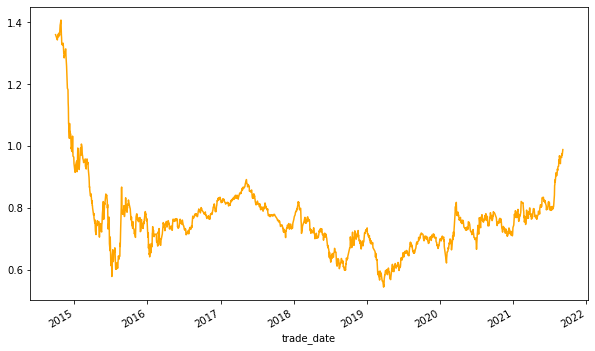

In [20]:
df_hs['strategy_1'].cumsum().apply(np.exp).plot(figsize=(10,6), color = 'orange')

<AxesSubplot:xlabel='trade_date'>

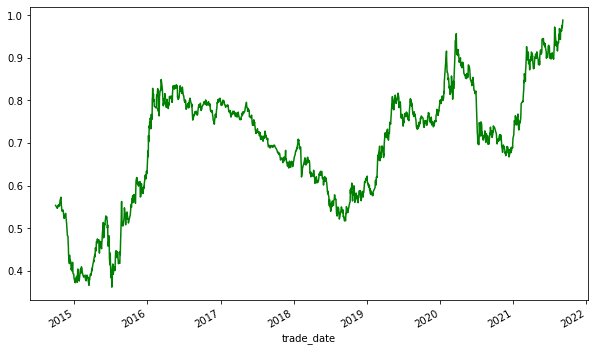

In [21]:
df_hs['strategy_2'].cumsum().apply(np.exp).plot(figsize=(10,6), color = 'green')

<AxesSubplot:xlabel='trade_date'>

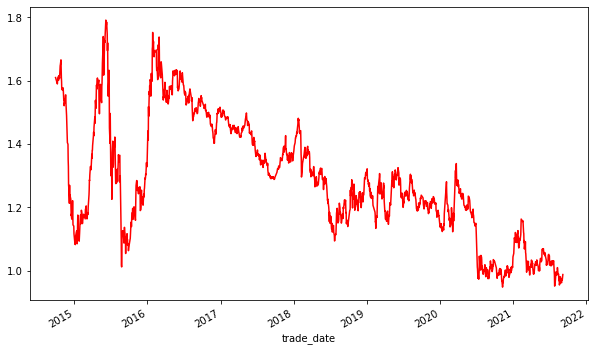

In [22]:
df_hs['strategy_3'].cumsum().apply(np.exp).plot(figsize=(10,6), color = 'red')

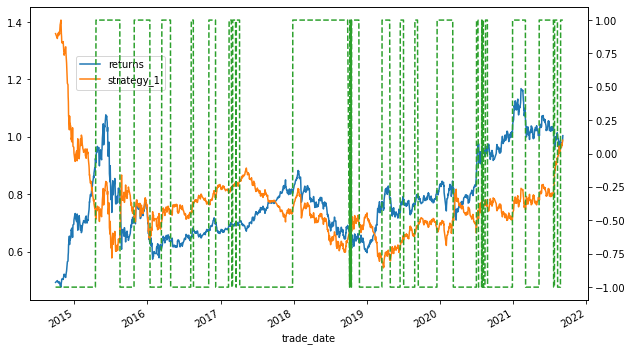

In [23]:
# cumulative sum (10-days vs. 60-days)
ax = df_hs[['returns', 'strategy_1']].cumsum().apply(np.exp).plot(figsize=(10, 6))
df_hs['position_1'].plot(ax=ax, secondary_y='position_1', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

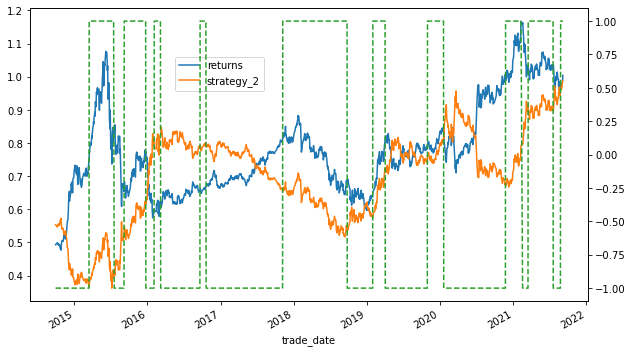

In [24]:
# cumulative sum (50 days vs 100 days)
ax = df_hs[['returns', 'strategy_2']].cumsum().apply(np.exp).plot(figsize=(10, 6))
df_hs['position_2'].plot(ax=ax, secondary_y='position_2', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

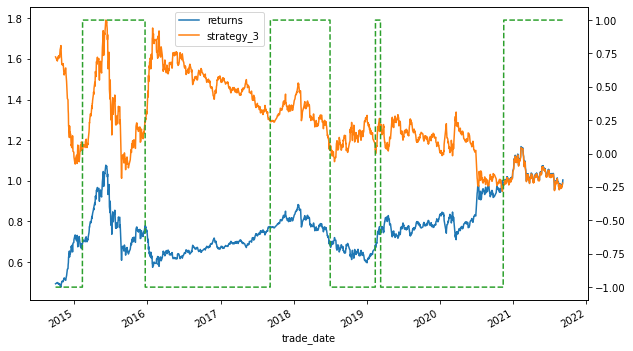

In [25]:
# cumulative sum (50 days vs 200 days)
ax = df_hs[['returns', 'strategy_3']].cumsum().apply(np.exp).plot(figsize=(10, 6))
df_hs['position_3'].plot(ax=ax, secondary_y='position_3', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

In [26]:
# direct sum ()
np.exp(df_hs[['returns', 'strategy_1']].sum())

returns       0.492945
strategy_1    1.359729
dtype: float64

In [27]:
# direct sum
np.exp(df_hs[['returns', 'strategy_2']].sum())

returns       0.492945
strategy_2    0.553549
dtype: float64

In [28]:
# direct sum
np.exp(df_hs[['returns', 'strategy_3']].sum())

returns       0.492945
strategy_3    1.609668
dtype: float64

策略1：10天均线 vs 60天均线

策略2：50天均线 vs 100天均线

策略3：50天均线 vs 200天均线



从累计收益的图像来看，策略3的表现要比大盘收益要好。从2015年以来大多数时间内，策略3的累计收益都要高于大盘收益。由于图像中，策略1和策略2与大盘收益多有交叉的地方。策略1和策略2的优势仅从图像中并不容易看出来。

如果我们直接看收益的总和，我们能看到3种策略都给我们带来了比大盘要高的收益。其中策略3的收益最高，带来了2倍多的收益 (1.61 vs. 0.49)，策略1紧随其后。而策略2只略高于大盘收益。

回头看交易的流程，我们发现随着短线与长线之间的日数的增加，买点与卖点交替的频数会降低。整体的交易流程会变得更加稳定。同时，如果我们用更多的天数来计算短线与长线，也会发现相同的趋势。我猜测这可能是长线变得平缓了，以及它自身的延时性所导致的。